In [1]:
#import matplotlib.pyplot as pl
import pylab as pl
from matplotlib import rc
from sys import argv
from numpy import float64,array,log

In [2]:
# OUT FILE
outfile = '/tmp/SN_2002cx_Spectra_old.svg'
labels = ['May 17', 'May 20', 'June 02', 'June 06'] 
colors = ['b','g', 'y' ,'r']

In [3]:
# Function to normalize to area
def areaNorm(X,Y):
    dX = abs(X[0] - X[1])
    area = sum( Y ) * dX
    Y = ( Y / area ) * 1000
    return (X,Y)

/home/agude/bin/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:34: RuntimeWarning: invalid value encountered in log


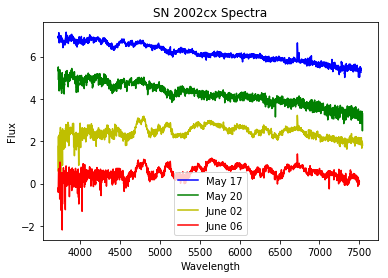

In [4]:
# Work on spectra
#files = argv[1:]

files = [
    "sn2002cx-20020517-fast.flm",
    "sn2002cx-20020520-fast.flm",
    "sn2002cx-20020602-fast.flm",
    "sn2002cx-20020606-fast.flm",
]

offset = float(len(files))*1.9
i = 0
for file in files:
    label = file.split('.')[0]

    # Open data
    f = open(file)
    cont = f.read()
    f.close()
    cont = cont.splitlines()

    # Process data
    wl = []
    fx = []
    for line in cont:
        if line.startswith('#'): continue
        sline = line.split()
        wl.append(sline[0])
        fx.append(sline[1])

    wl = array(wl,dtype=float64)
    fx = array(fx,dtype=float64)
    (wl,fx) = areaNorm(wl,fx)
    fx = log(fx)
    fx = fx + offset

    # Plot
    #rc('text', usetex=True)
    #rc('font', family='serif')
    pl.plot(wl,fx,'%s-'%(colors[i]),label=labels[i])

    offset -= 1.9
    i += 1

ax = pl.axis()
pl.axis((ax[0],ax[1],ax[2],ax[3]))
pl.xlabel(r'Wavelength')
pl.ylabel('Flux')
pl.title('SN 2002cx Spectra')
pl.legend(loc=0)
pl.savefig(outfile)
pl.show()